# **Actividad Semanal 5**

José Eduardo Arteaga Valdés 

A01273800

Materia: Ciencia y Analítica de Datos

Profesora Titular: María de la Paz Rico Fernández

Profesor Tutor: Mario Alberto Solano Saldaña


# Bienvenido al notebook
#Repaso de Reducción de dimensiones
El objetivo es que entendamos de una manera visual, que es lo que pasa cuando nosotros seleccionamos cierto número de componentes principales o % de variabilidad  de una base de datos.

Primero entenderemos, que pasa adentro de PCA que se basa en lo siguiente a grandes razgos:

**Análisis de Componentes Principales**

El análisis de datos multivariados involucra determinar transformaciones lineales que ayuden
a entender las relaciones entre las características importantes de los datos. La idea central del Análisis de Componentes Principales (PCA) es reducir las dimensiones de un conjunto de datos que presenta variaciones correlacionadas, reteniendo una buena proporción de la variación presente en dicho conjunto. Esto se logra obteniendo la transformación a un nuevo conjunto de variables: los componentes principales (PC). Cada PC es una combinación lineal con máxima varianza en dirección ortogonal a los demás PC.


![title](https://miro.medium.com/max/720/1*XGaA7KWUlhWZLIezYEBIHA.gif)


Para entender un poco más de PCA y SVD, visita el siguiente link:
*Truco: Prueba entrar con tu cuenta del tec :)*

https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8


Basicamente, vamos a seguir los siguientes pasos:

1. Obtener la covarianza. OJO: X tiene sus datos centrados :)

![title](https://miro.medium.com/max/194/1*92t9OuqxIG0YpJXsNNgI4A.png)

2. Los componentes principales se van a obtener de la eigen descomposicion de la matriz de covarianza.

![title](https://miro.medium.com/max/260/1*c1S0_26A8RxEQQUVyMp5Vw.png)

3. Para la reducción de dimensiones vamos a seleccionar k vectores de W y proyectaremos nuestros datos.

![title](https://miro.medium.com/max/214/1*jnj2YMpWIApnCzxRU_zjfg.png)

![title](https://miro.medium.com/max/720/1*ba0XpZtJrgh7UpzWcIgZ1Q.jpeg)






# **Ejercicio 1, Descomposición y composición**
***Descomposición***

Encuentra los eigenvalores y eigenvectores de las siguientes matrices

$A = \begin{pmatrix} 3,0,2 \\ 3,0,-2 \\ 0,1,1 \end{pmatrix}$
$A2 = \begin{pmatrix} 1,3,8 \\ 2,0,0 \\ 0,0,1 \end{pmatrix}$
$A3 = \begin{pmatrix} 5,4,0 \\ 1,0,1 \\ 10,7,1 \end{pmatrix}$

y reconstruye la matriz original a traves de las matrices 
$WDW^{-1}$ (OJO. Esto es lo mismo de la ecuación del paso 2 solo le cambiamos la variable a la matriz diagonal)




# Eigenvalores y eigenvectores

In [ ]:
###-----------------EJEMPLO DE EIGENVALORES
import numpy as np
from numpy import array
from numpy.linalg import eig
# define la matriz
A = array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print("-------Matriz original-------")
print(A)
print("-----------------------------")
# calcula la eigendescomposición
values, vectors = eig(A)
print(values) #D
print(vectors) #W

#Ejemplo de reconstrucción


values, vectors = np.linalg.eig(A)

W = vectors
Winv = np.linalg.inv(W)
D = np.diag(values)
#la matriz B tiene que dar igual a A
#reconstruye la matriz 
print("-------Matriz reconstruida-------")
# Realiza la reconstruccion de B=W*D*Winv, te da lo mismo de A?
#ojo, estas multiplicando matrices, no escalares ;)
#TU CODIGO AQUI-------------------------------------
#np.dot(array a, array b)
temp = np.dot(W, D)
B = np.dot(temp, Winv)
print(B)
print("-----------------------------")

-------Matriz original-------
[[1 2 3]
 [4 5 6]
 [7 8 9]]
-----------------------------
[ 1.61168440e+01 -1.11684397e+00 -1.30367773e-15]
[[-0.23197069 -0.78583024  0.40824829]
 [-0.52532209 -0.08675134 -0.81649658]
 [-0.8186735   0.61232756  0.40824829]]
-------Matriz reconstruida-------
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]
-----------------------------


In [ ]:
#Matriz 1 sin centrar

#importamos librerías
import numpy as np
from numpy import array
from numpy.linalg import eig
from numpy.linalg import inv


#definimos la matriz
M1 = array([[3, 0, 2], [3, 0, -2], [0, 1, 1]])

print("-------Matriz original-------")
print(M1)
print("-----------------------------")


#calculamos la eigendescomposición
values2, vectors2 = eig(M1)


#reconstrucción de la matriz
W2 = vectors2
Winv2 = inv(W2)
D2 = np.diag(values2)

temp2 = np.dot(W2, D2)
B2 = np.dot(temp2, Winv2)

print("-------Matriz reconstruida-------")
print(B2)
print("-----------------------------")

print("-------Matriz reconstruida redondeada-------")
print(np.round(B2))
print("-----------------------------")

-------Matriz original-------
[[ 3  0  2]
 [ 3  0 -2]
 [ 0  1  1]]
-----------------------------
-------Matriz reconstruida-------
[[ 3.00000000e+00+1.12272023e-16j  3.36536354e-16-9.67833078e-17j
   2.00000000e+00-3.95053829e-17j]
 [ 3.00000000e+00-1.66253281e-16j  9.99200722e-16+1.12958209e-16j
  -2.00000000e+00+2.77350775e-17j]
 [ 1.11022302e-16+1.03283117e-18j  1.00000000e+00-7.61630485e-17j
   1.00000000e+00+1.02438275e-16j]]
-----------------------------
-------Matriz reconstruida redondeada-------
[[ 3.+0.j  0.-0.j  2.-0.j]
 [ 3.-0.j  0.+0.j -2.+0.j]
 [ 0.+0.j  1.-0.j  1.+0.j]]
-----------------------------


In [ ]:
#Matriz 1 con centrado (manual)

#importamos librerías
import numpy as np
from numpy import array
from numpy.linalg import eig
from numpy.linalg import inv


#definimos la matriz
M = array([[3, 0, 2], [3, 0, -2], [0, 1, 1]])

#centramos la matriz
promedioM = np.mean(M)
M1 = M - promedioM

print("-------Matriz original-------")
print(M)
print("-----------------------------")


#calculamos la eigendescomposición
values2, vectors2 = eig(M1)


#reconstrucción de la matriz
W2 = vectors2
Winv2 = inv(W2)
D2 = np.diag(values2)

temp2 = np.dot(W2, D2)
B2 = np.dot(temp2, Winv2)

#corregimos la matriz (revertimos centrado)
M2 = B2 + promedioM

print("-------Matriz reconstruida-------")
print(M2)
print("-----------------------------")

print("-------Matriz reconstruida redondeada-------")
print(np.round(M2))
print("-----------------------------")

-------Matriz original-------
[[ 3  0  2]
 [ 3  0 -2]
 [ 0  1  1]]
-----------------------------
-------Matriz reconstruida-------
[[ 3.00000000e+00-8.12643886e-18j  0.00000000e+00+1.15181645e-17j
   2.00000000e+00+5.25604618e-17j]
 [ 3.00000000e+00-3.80727049e-16j  2.22044605e-16+8.42117665e-18j
  -2.00000000e+00-1.87909111e-16j]
 [ 0.00000000e+00+6.70479703e-17j  1.00000000e+00+7.03015532e-18j
   1.00000000e+00+7.73631592e-17j]]
-----------------------------
-------Matriz reconstruida redondeada-------
[[ 3.-0.j  0.+0.j  2.+0.j]
 [ 3.-0.j  0.+0.j -2.-0.j]
 [ 0.+0.j  1.+0.j  1.+0.j]]
-----------------------------


In [ ]:
#Matriz 2

#importamos librerías
import numpy as np
from numpy import array
from numpy.linalg import eig
from numpy.linalg import inv


#definimos la matriz
M2 = array([[1, 3, 8], [2, 0, 0], [0, 0, 1]])

print("-------Matriz original-------")
print(M2)
print("-----------------------------")


#calculamos la eigendescomposición
values3, vectors3 = eig(M2)


#reconstrucción de la matriz
W3 = vectors3
Winv3 = inv(W3)
D3 = np.diag(values3)

temp3 = np.dot(W3, D3)
B3 = np.dot(temp3, Winv3)


print("-------Matriz reconstruida-------")
print(B3)
print("-----------------------------")

print("-------Matriz reconstruida redondeada-------")
print(np.round(B3))
print("-----------------------------")

-------Matriz original-------
[[1 3 8]
 [2 0 0]
 [0 0 1]]
-----------------------------
-------Matriz reconstruida-------
[[1.00000000e+00 3.00000000e+00 8.00000000e+00]
 [2.00000000e+00 7.41483138e-17 7.08397389e-16]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
-----------------------------
-------Matriz reconstruida redondeada-------
[[1. 3. 8.]
 [2. 0. 0.]
 [0. 0. 1.]]
-----------------------------


In [ ]:
#Matriz 3

#importamos librerías
import numpy as np
from numpy import array
from numpy.linalg import eig
from numpy.linalg import inv


#definimos la matriz
M3 = array([[1, 3, 8], [2, 0, 0], [0, 0, 1]])

print("-------Matriz original-------")
print(M3)
print("-----------------------------")


#calculamos la eigendescomposición
values4, vectors4 = eig(M3)


#reconstrucción de la matriz
W4 = vectors4
Winv4 = inv(W4)
D4 = np.diag(values4)

temp4 = np.dot(W4, D4)
B4 = np.dot(temp4, Winv4)

print("-------Matriz reconstruida-------")
print(B4)
print("-----------------------------")

print("-------Matriz reconstruida redondeada-------")
print(np.round(B4))
print("-----------------------------")

-------Matriz original-------
[[1 3 8]
 [2 0 0]
 [0 0 1]]
-----------------------------
-------Matriz reconstruida-------
[[1.00000000e+00 3.00000000e+00 8.00000000e+00]
 [2.00000000e+00 7.41483138e-17 7.08397389e-16]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
-----------------------------
-------Matriz reconstruida redondeada-------
[[1. 3. 8.]
 [2. 0. 0.]
 [0. 0. 1.]]
-----------------------------


**¿Qué significa  reducir dimensiones?**

Esto será cuando proyectemos a ese espacio de los componentes principales pero no los seleccionemos todos, solo los más importantes y viajemos de regreso a nuestras unidades a través de una proyección.

Es decir:
Unidades-PC
PC-Unidades

Veamoslo gráficamente, ¿qué pasa con esa selección de los PCs y su efecto?.


Para ello usaremos Singular Value Descomposition (SVD).



# Singular Value Descomposition(SVD)

Es otra descomposición que tambien nos ayudara a reducir dimensiones.

<img src="https://miro.medium.com/max/720/1*6wkgGgBy2NLVmRVOw8K86w.png" width="300">



# **Ejercicio 2**
Juega con Lucy, una cisne, ayudala a encontrar cuantos valores singulares necesita para no perder calidad a través de SVD. Posteriormente usa 3 imágenes de tu preferencia y realiza la misma acción :D

A esto se le llama **compresión de imagenes** :o

[72. 73. 74. ... 48. 47. 47.]


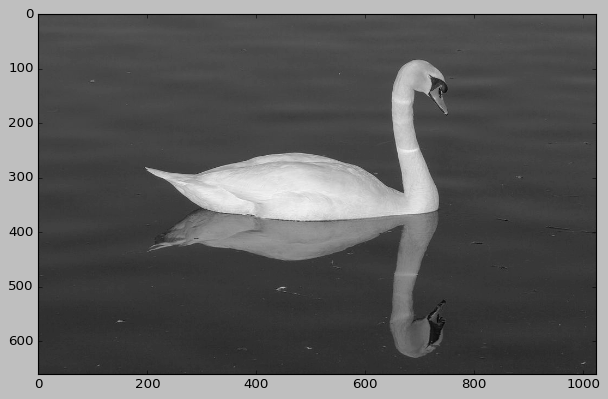

<PIL.Image.Image image mode=LA size=1024x660 at 0x7F0F2EEE4310>


In [ ]:
from six.moves import urllib
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('classic')
img = Image.open(urllib.request.urlopen('https://biblioteca.acropolis.org/wp-content/uploads/2015/03/Cisne.jpg')).convert('LA')
#img = Image.open('lucy.jpg')
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)

imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)

In [ ]:
U,D,V = np.linalg.svd(imgmat)
imgmat.shape


(660, 1024)

In [ ]:
U.shape

(660, 660)

In [ ]:
V.shape

(1024, 1024)

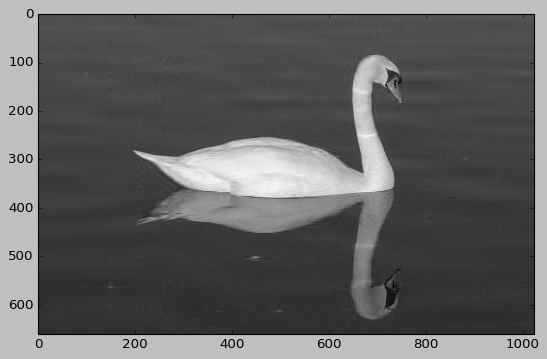

In [ ]:
#Cuantos valores crees que son necesarios?
#A=U*D*V
#aqui los elegiremos---------------------------
# por las dimensiones de este caso en particular 
#iremos de 0-660, siendo 660 como normalmente están los datos
#con 50 podemos observar que Lucy se ve casi igual, es decir conservamos aquello que en 
# realidad estaba aportando a la imagen en este caso :D por medio de la variabilidad 
#juega con el valor nvalue y ve que pasa con otros valores
nvalue = 50
#------------------------------
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])
#ve las dimensiones de la imagen y su descomposicion
#660x1024= U(660X660)D(660X1024)V(1024x1024)
        #=U(660Xnvalues)D(nvaluesXnvalue)V(nvaluesx1024)

        #=U(660X50)(50X50)(50X1024)
plt.imshow(reconstimg,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

¡Ahora es tu turno!, comprime 3 imagenes

[72. 73. 74. ... 48. 47. 47.]


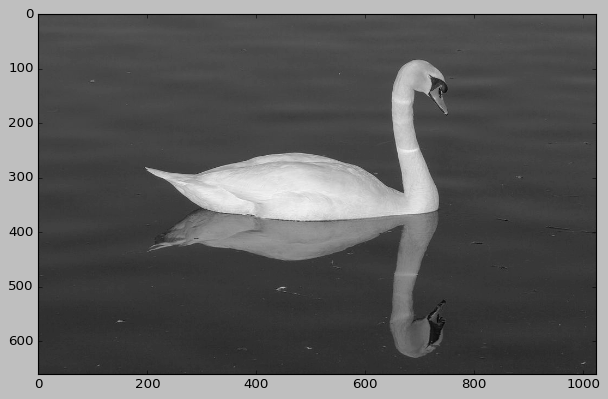

<PIL.Image.Image image mode=LA size=1024x660 at 0x7F734D8E9350>


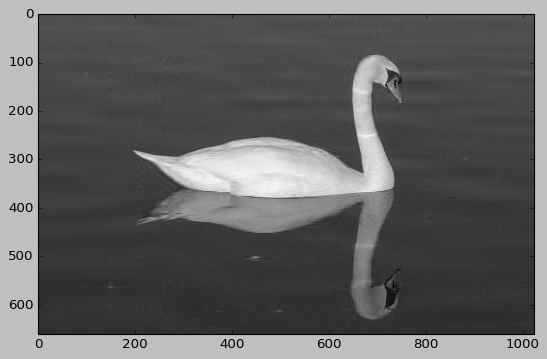

Felicidades la imagen está comprimida


In [ ]:
#Ejercicio 2

from six.moves import urllib
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('classic')
img = Image.open(urllib.request.urlopen('https://biblioteca.acropolis.org/wp-content/uploads/2015/03/Cisne.jpg')).convert('LA')
#img = Image.open('lucy.jpg')
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)

imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)

U,D,V = np.linalg.svd(imgmat)
imgmat.shape

U.shape

V.shape

#Cuantos valores crees que son necesarios?
#A=U*D*V
#aqui los elegiremos---------------------------
# por las dimensiones de este caso en particular 
#iremos de 0-660, siendo 660 como normalmente están los datos
#con 50 podemos observar que Lucy se ve casi igual, es decir conservamos aquello que en 
# realidad estaba aportando a la imagen en este caso :D por medio de la variabilidad 
#juega con el valor nvalue y ve que pasa con otros valores
nvalue = 50
#------------------------------
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])
#ve las dimensiones de la imagen y su descomposicion
#660x1024= U(660X660)D(660X1024)V(1024x1024)
        #=U(660Xnvalues)D(nvaluesXnvalue)V(nvaluesx1024)

        #=U(660X50)(50X50)(50X1024)
plt.imshow(reconstimg,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

[227. 226. 226. ... 208. 208. 208.]


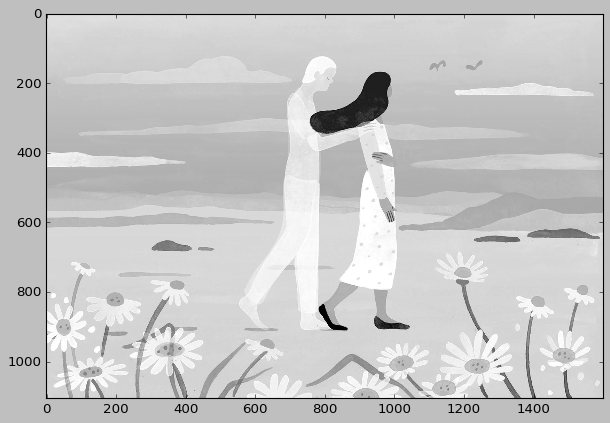

<PIL.Image.Image image mode=LA size=1600x1104 at 0x7F734B3CFF10>


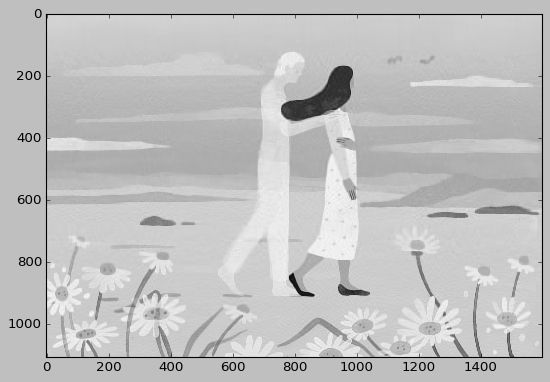

In [ ]:
#imagen 1

from six.moves import urllib
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('classic')
img = Image.open(urllib.request.urlopen('https://richardsolomon.com/wp-content/uploads/2019/07/Broadview-HR.jpg')).convert('LA')
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)

imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)

U,D,V = np.linalg.svd(imgmat)
imgmat.shape

U.shape

V.shape

nvalue = 90

reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])

plt.imshow(reconstimg,cmap='gray')
plt.show()

[ 36.  40.  44. ... 135. 139. 141.]


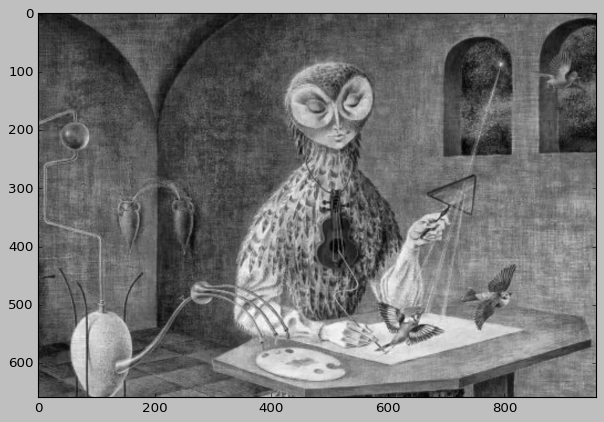

<PIL.Image.Image image mode=LA size=958x658 at 0x7F734AEC2210>


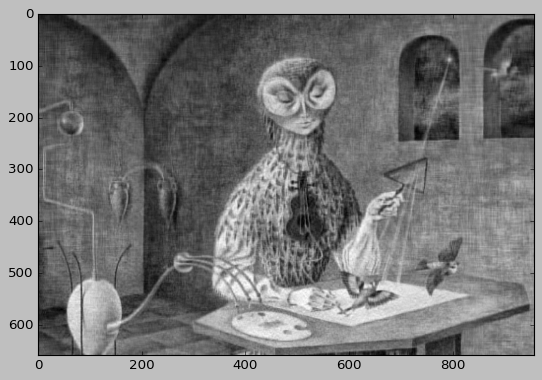

In [ ]:
#imagen 2

from six.moves import urllib
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('classic')
img = Image.open(urllib.request.urlopen('https://cdn2.chicmagazine.com.mx/uploads/media/2020/05/25/leonora-carrington-lugares-obras-arte.jpg')).convert('LA')
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)

imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)

U,D,V = np.linalg.svd(imgmat)
imgmat.shape

U.shape

V.shape

nvalue = 80

reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])

plt.imshow(reconstimg,cmap='gray')
plt.show()

[117. 111. 110. ...  28.  27.  25.]


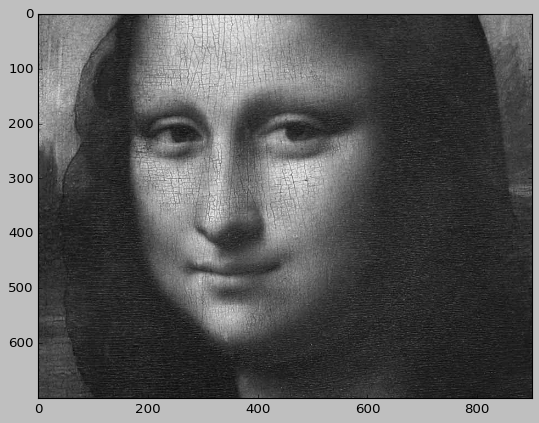

<PIL.Image.Image image mode=LA size=900x700 at 0x7F734AC25950>


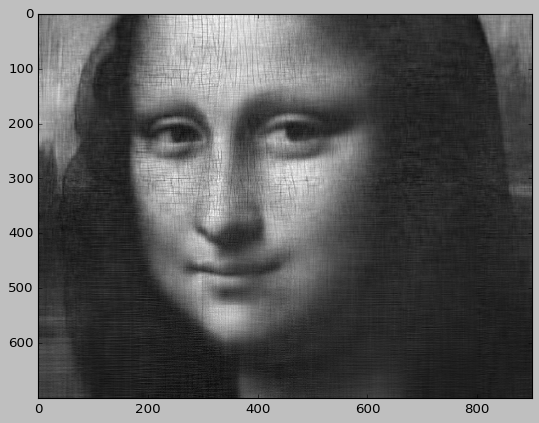

In [ ]:
#imagen 3

from six.moves import urllib
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('classic')
img = Image.open(urllib.request.urlopen('https://i0.wp.com/arteref.com/wp-content/uploads/2019/04/monalisa-detalhe.jpg')).convert('LA')
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)

imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)

U,D,V = np.linalg.svd(imgmat)
imgmat.shape

U.shape

V.shape

nvalue = 40

reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])

plt.imshow(reconstimg,cmap='gray')
plt.show()

# **Ejercicio 3**

**Feature importances**

Para este ejercicio, te pediremos que sigas el tutorial de la siguiente pagina:

https://towardsdatascience.com/pca-clearly-explained-how-when-why-to-use-it-and-feature-importance-a-guide-in-python-7c274582c37e




In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler
plt.style.use('ggplot')

In [4]:
# Load the data
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [5]:
# Z-score the features
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [6]:
# The PCA model
pca = PCA(n_components = 2) # estimate only 2 PCs
X_new = pca.fit_transform(X) # project the original data into the PCA space

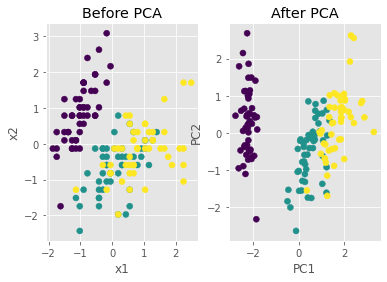

In [8]:
# Plots

fig, axes = plt.subplots(1,2)

axes[0].scatter(X[:,0], X[:,1], c=y)
axes[0].set_xlabel('x1')
axes[0].set_ylabel('x2')
axes[0].set_title('Before PCA')

axes[1].scatter(X_new[:,0], X_new[:,1], c=y)
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title('After PCA')
plt.show()

In [10]:
print(abs( pca.components_ ))

[[0.52106591 0.26934744 0.5804131  0.56485654]
 [0.37741762 0.92329566 0.02449161 0.06694199]]


# **Preguntas de cierre**

**1. Realiza un comentario relacionado a los pasos que se llevaron a cabo en este proceso de features importances.**

El ejercicio funciona como cheat sheet del PCA, fundamental paso a paso del procedimiento.
___

Los pasos son relativamente sencillos a seguir una vez se tiene la data seleccionada.

Primero, se estandariza la distribución de los valores con el fragmento #Z-score the features. Comenzando con la función StandardScaler(). Para después utilizar la función PCA - indicando el número de componentes a calcular.

**2. ¿Qué es feature importance y para que nos sirve?**

El corazón de PCA. Después de la agrupación de información en componentes, podemos determinar cuáles características influyen más en el target del componente. Es decir, que variables tienen más responsabilidad en el output.

**3. ¿Qué hallazgos fueron los más relevantes durante el análisis del ejercicio?**

Tal como indica el artículo, podemos identificar que:
* de PC1, las features más importantes son 3, 4 y 1
* mientras que de PC2, las features más importantes son 2 y 1
* siempre las de mayor valor numérico 

**4. ¿Dónde lo aplicarías o te sería de utilidad este conocimiento?**

En la depuración y limpieza de datos. Acompañado de un análisis de predicción en tendencias. En mi campo laboral, lo implementaría como algoritmos de cálculo para una Customer Data Platform (CDP).

En la oferta de servicios de Salesforce, contamos con un CDP dedicado a la unificación de información de un cliente. Capaz de identificar a un solo individuo en un espectro omnicanal. Es decir, unimos la identidad de X persona con base en huella digital de diversos canales digitales. Por lo que se reúne una inmensa cantidad de información que se procesa para:
* la unificación del perfil en sí
* la creación de audiencias por tendecias.

Así entonces, una manera clave de potenciar cualquier CDP en el mercado es eliminando la dependencia que estas plataformas tienen en motores de algoritmos de predicción.

Aunque hacemos un trabajo implecable en la limpieza de los datos, recurrimos a externos para obtener algoritmos de procesamiento que identifiquen tendencias y predicciones. 

Con un proceso PCA nativo, podríamos empoderar la plataforma y completar la experiencia que ofertamos a nuestros clientes.